# Exercise 04 - Due Saturday, November 18 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a star schema. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

** Add your markdown and code cells only in the designated areas after "Answers:". Do not remove or change any existing cells. **

*Deadline*: Saturday, November 18, 12pm.

## Setup - obtain data

The US City Open Data Census has data on [Campaign Finance Contributions](http://us-city.census.okfn.org/dataset/campaign-finance).  Let's take a look at data from [Washington DC](http://opendata.dc.gov/datasets/campaign-financial-contributions).

First we download the dataset:

In [1]:
!wget -O dc_contributions.csv https://opendata.arcgis.com/datasets/6443e0b5b2454e86a3208b8a38fdee84_34.csv

--2017-11-18 07:47:16--  https://opendata.arcgis.com/datasets/6443e0b5b2454e86a3208b8a38fdee84_34.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.22.192.109, 34.235.70.5
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.22.192.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘dc_contributions.csv’

dc_contributions.cs     [             <=>    ]  53.56M  22.0MB/s    in 2.4s    

2017-11-18 07:47:19 (22.0 MB/s) - ‘dc_contributions.csv’ saved [56160038]



## Part 1 - examine the data (30 points)

**Question 1** :
Use `csvstat` and other tools as you see fit and observe its contents. Describe what you see:  How many records does  this dataset have? What do all the columns mean?  Are there null values?  Which columns interest you the most? Which columns present facts and which columns present dimensions?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

Hint: to get help on command line tools, try the `--help` option. For example: `csvstat --help`.

Hint: due to the size of the dataset, if you use `csvstat`, you can apply it on sample or the first 10000 lines.

**Answer:**

* File size:

In [2]:
!ls -lh dc_contributions.csv

-rw-rw-r-- 1 ubuntu ubuntu 54M Nov 18 07:44 dc_contributions.csv


* Row numbers in csv:

In [3]:
!wc -l dc_contributions.csv

214982 dc_contributions.csv


* Columns in csv:

In [4]:
!head -1 dc_contributions.csv | csvlook

|------------+---------------+---------------+--------------+-----------------+---------+-----------------+------------------+----------+-----------------+--------+---------------+------------+--------+--------+----------+-----------+-------------+--------------------|
|  ﻿OBJECTID | COMMITTEENAME | CANDIDATENAME | ELECTIONYEAR | CONTRIBUTORNAME | ADDRESS | CONTRIBUTORTYPE | CONTRIBUTIONTYPE | EMPLOYER | EMPLOYERADDRESS | AMOUNT | DATEOFRECEIPT | ADDRESS_ID | XCOORD | YCOORD | LATITUDE | LONGITUDE | FULLADDRESS | GIS_LAST_MOD_DTTM  |
|------------+---------------+---------------+--------------+-----------------+---------+-----------------+------------------+----------+-----------------+--------+---------------+------------+--------+--------+----------+-----------+-------------+--------------------|


* Have a look at the data.

In [5]:
!tail -1 dc_contributions.csv | csvlook

|---------+-----------------+---------------+------+--------------------+----------------------------------------------+------------+-------+--------------------------+--+-----+--------------------------+--------+-----------+-----------+------------------+--------------------+-----------------------+---------------------------|
|  214975 | The Common Good | David Catania | 2002 | Victor  Kugajevsky | 3611 Fulton Street, NW, Washington, DC 20007 | Individual | Other | Health Managment Systems |  | 150 | 2007-12-17T00:00:00.000Z | 262653 | 393790.63 | 139838.34 | 38.9263998600368 | -77.07160932368019 | 3611 FULTON STREET NW | 2017-11-13T06:18:09.000Z  |
|---------+-----------------+---------------+------+--------------------+----------------------------------------------+------------+-------+--------------------------+--+-----+--------------------------+--------+-----------+-----------+------------------+--------------------+-----------------------+---------------------------|


* Basic summary of first 10000 rows (header included):

In [6]:
!head -10000 dc_contributions.csv | csvstat

  1. ﻿OBJECTID
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 9999
	Sum: 49995000
	Mean: 5000.0
	Median: 5000
	Standard Deviation: 2886.4626563783336
	Unique values: 9999
  2. COMMITTEENAME
	<class 'str'>
	Nulls: False
	Unique values: 332
	5 most frequent values:
		Fenty 2010:	756
		Re-Elect Jim Graham  (2006):	438
		Re-Elect Kwame R. Brown:	391
		Muriel Bowser for Mayor:	354
		Washington DC Association of Realtors PAC:	330
	Max length: 82
  3. CANDIDATENAME
	<class 'str'>
	Nulls: True
	Unique values: 175
	5 most frequent values:
		Adrian Fenty:	812
		Muriel Bowser:	794
		Kwame Brown:	525
		Jim Graham:	454
		Vincent Gray:	368
	Max length: 24
  4. ELECTIONYEAR
	<class 'int'>
	Nulls: False
	Min: 2002
	Max: 2018
	Sum: 20097764
	Mean: 2009.977397739774
	Median: 2010
	Standard Deviation: 4.669975380655277
	Unique values: 13
	5 most frequent values:
		2014:	1416
		2006:	1291
		2010:	1211
		2002:	1203
		2015:	1026
  5. CONTRIBUTORNAME
	<class 'str'>
	Nulls: True
	Unique values: 8096
	5 most frequ

* From the csvstat summary,we can see that most columns contain null values in the first 10000 rows.

* We have 19 columns in our csv.
* OBJECTID: the index number of the data; it's the primary key of our data.
* COMMITTEENAME, CANDIDATENAME: details of each election campaign contribution; they are the dimension of contribution.
* ELECTION YEAR: YEAR of campaign information; it is dimension of campaign.
* CONTRIBUTORNAME: the person or organization that made the contribution; it is fact of contributor; it can be dimension of contribution.
* ADDRESS: the fact of contributor.
* CONTRIBUTIONTYPE, CONTRIBUTORTYPE: details of each contribution; they are dimensions of contribution.
* EMPLOYER: dimension of contributor.
* EMPLOYERADDRESS: the fact of EMPLOYER.
* AMOUNT: the fact of contribution.
* DATEOFRECEIPT: the dimension of contributions.
* ADDRESSID: the index or key of the address.
* XCOORD, YCOORD, LATITUDE, LONGITUDE: the location fact.
* FULLADDRESS: the address fact.
* GIS_LAST_MOD_DTTM: date and time; it's probably a dimension of the time that GIS information updated/modified.
* ** Actually, some solumns can be either dimensions of facts, it depends on how we evaluate these data. **

## Part 2 - create a database and load the data (40 points)
Create and connect to a new database, create database tables in it based on the following provided star schema, and load this dataset into it. 

* `campaign` (`campaign_key`, `committee_name`, `candidate_name`, `election_year`)
* `contributor` (`contributor_key`, `name`, `type`, `employer`)
* `contribution_facts` (`campaign_key`, `contributor_key`, `amount`)

In [7]:
%load_ext sql

In [8]:
!dropdb --if-exists -U student assignment4

In [9]:
!createdb -U student assignment4

In [10]:
%sql postgresql://student@/assignment4

'Connected: student@assignment4'

First, let's create the table `contribution_facts`:

In [11]:
%%sql
DROP TABLE IF EXISTS contribution_facts;

CREATE TABLE contribution_facts (
    id INTEGER,
    committee_name VARCHAR(500) NOT NULL,
    candidate_name VARCHAR(50),
    election_year INTEGER NOT NULL,
    contributor_name VARCHAR(500),
    contributor_address VARCHAR(500),
    contributor_type VARCHAR(100),
    contribution_type VARCHAR(100),
    employer VARCHAR(500),
    employer_address VARCHAR(500),
    amount NUMERIC(20, 2),
    date_of_receipt DATE NOT NULL,
    address_id INTEGER,
    address_x NUMERIC(20, 2),
    address_y NUMERIC(20, 2),
    address_latitude NUMERIC,
    address_longitude NUMERIC,
    address_full VARCHAR(500),
    gis_last_mod TIMESTAMPTZ NOT NULL
)

Done.
Done.


[]

** Question 2 (10 points)** :
Load the dataset into the table `contribution_facts` and verify the loaded records.

Hint: If you get some errors, please examine the error messages carefully and fix the problems, including any problems in the above CREATE TABLE statement.

** Answer: **

Our table can not allow nulls in some columns. But we do have nulls corresponding to those columns in csv.

* We can build a temporary table without any constraints to accept data and then solve the problem using SQL queries.

In [12]:
!cp dc_contributions.csv /tmp/dc_contributions.csv

In [13]:
%%sql
DROP TABLE IF EXISTS temp;

CREATE TABLE temp (
    id INTEGER,
    committee_name VARCHAR(500) ,
    candidate_name VARCHAR(50),
    election_year INTEGER ,
    contributor_name VARCHAR(500),
    contributor_address VARCHAR(500),
    contributor_type VARCHAR(100),
    contribution_type VARCHAR(100),
    employer VARCHAR(500),
    employer_address VARCHAR(500),
    amount NUMERIC(20, 2),
    date_of_receipt DATE ,
    address_id INTEGER,
    address_x NUMERIC(20, 2),
    address_y NUMERIC(20, 2),
    address_latitude NUMERIC,
    address_longitude NUMERIC,
    address_full VARCHAR(500),
    gis_last_mod TIMESTAMPTZ 
)

Done.
Done.


[]

In [14]:
%%sql
COPY temp FROM '/tmp/dc_contributions.csv'
CSV
HEADER;

214975 rows affected.


[]

* But the rows in our temp table is not the same as the line number in csv file.
* Why?

In [15]:
!grep -c ",*," dc_contributions.csv

214982


In [16]:
!grep -c "*,*" dc_contributions.csv

20


In [17]:
!grep -c "*," dc_contributions.csv

12


* Maybe some lines are different.
* But we have loaded all the data in temp table without error.

* Now, we can load data to our target table from this temporary table.

* I will find all the nulls in columns with NOT NULL constraints.

In [18]:
%%sql
SELECT *
FROM temp
WHERE committee_name IS NULL OR election_year IS NULL OR date_of_receipt IS NULL OR gis_last_mod IS NULL

28 rows affected.


id,committee_name,candidate_name,election_year,contributor_name,contributor_address,contributor_type,contribution_type,employer,employer_address,amount,date_of_receipt,address_id,address_x,address_y,address_latitude,address_longitude,address_full,gis_last_mod
91668,Committee for John Smith,John Smith,None,John Smith,"12th street', Washington, DC 20023",Individual,Money Order,Verizon',"12 U Street', Washington, DC 20002",30.00,2003-04-03,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
91669,Committee for John Smith,John Smith,None,ABC Company',"12th street', Washington, DC 20023",Corporation,Money Order,None,None,20.00,2003-04-03,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
91670,Committee for John Smith,John Smith,None,John Smith,"1211 South Bon View Ave', Washington, DC 20003",Individual,Other,None,None,20.00,2003-04-03,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
91799,Washington Gas Light Company PAC,Lankward Smith,None,Bank of America,"undisclosed, Washington, DC 00000",Corporation,Check,None,None,31.00,2003-02-01,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
91800,Washington Gas Light Company PAC,Lankward Smith,None,Bank of America,"undisclosed, Washington, DC 00000",Corporation,Check,None,None,31.00,2003-02-03,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
91801,Washington Gas Light Company PAC,Lankward Smith,None,Toni Washington,"1100 H. Street NW, Washington, DC 20080",Individual,Check,Washington Gas Light,"1100 H. Street NW, Washington, DC 20080",8.00,2003-06-30,239128,397624.83,136852.80,38.899523838996494,-77.027381235422496,1100 H STREET NW,2017-11-13 06:18:09+00:00
92776,The Vi Group,None,None,ABC Corp.,"2001 14th Street, NW, Washington, DC 20009",Corporation,Check,None,None,1000.00,2006-04-12,240357,397248.69,138809.30,38.917147567900898,-77.031725259069489,2001 14TH STREET NW,2017-11-13 06:18:09+00:00
92777,The Vi Group,None,None,John Doe,"444 6th Street, NW, Washington, DC 20001",Individual,Check,Pepco,"701 9th Street, NW, Washington, DC 20068",5000.00,2006-04-13,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
92778,The Vi Group,None,None,John Doe,"444 6th Street, Washington, DC 20001",Individual,Check,PEPCO,"701 9th Street, NW, Washington, DC 20068",500.00,2006-04-14,None,None,None,None,None,None,2017-11-13 06:18:09+00:00
127508,G For Ward 4,D Gilliam,None,Sonya Lake,"135 B Street, NW, Washington, DC 20011",Individual,Cash,"Power, Inc.","555 M Street, NW, Suite 100, Washington, DC 20009",25.00,2008-06-23,None,None,None,None,None,None,2017-11-13 06:18:09+00:00


In [19]:
%%sql
SELECT *
FROM temp
WHERE committee_name IS NULL OR date_of_receipt IS NULL OR gis_last_mod IS NULL

0 rows affected.


id,committee_name,candidate_name,election_year,contributor_name,contributor_address,contributor_type,contribution_type,employer,employer_address,amount,date_of_receipt,address_id,address_x,address_y,address_latitude,address_longitude,address_full,gis_last_mod


* Now, we have 28 rows to update. But, interestingly, all nulls are in election_year column.

In [20]:
%%sql
SELECT election_year,date_of_receipt
FROM temp
LIMIT 10

10 rows affected.


election_year,date_of_receipt
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04
2015,2015-02-04


* It seems that we can not infer the election year from date_of_receipt columns.
* So, I will just set all those unknown election_years as my phone number (2028554071) which is unique and acceptable.

In [21]:
%%sql
UPDATE temp
SET election_year=2028554071
WHERE election_year IS NULL

28 rows affected.


[]

* Copy data from temp to our target table:

In [22]:
%%sql
Insert Into contribution_facts
Select * from temp

214975 rows affected.


[]

In [23]:
%%sql
SELECT count(*)
FROM temp

1 rows affected.


count
214975


* It worked. The row numbers in two tables are exactly the same.
* It's time to remove the temp table.

In [24]:
%%sql
DROP TABLE IF EXISTS temp

Done.


[]

** End of answer to Question 2 **

Next, we are going to create the dimension table `contributor`. 

First let's work on the SELECT statement that extracts contributor-related dimension details like `contributor_name`, `contributor_type` and `employer`.

In [25]:
%%sql
SELECT DISTINCT contributor_name, contributor_type, employer
FROM contribution_facts
LIMIT 10;

10 rows affected.


contributor_name,contributor_type,employer
None,None,None
Victor Ayala,Individual,DC Taxicab Commission
Harry Harrison,Individual,Aronson LLC
DC Development & Consulting LLC,Corporation,None
Virginia Contractors Supply Inc,Corporation,None
Euclid Mortgage Aservices,Corporation,None
Kool Smiles,Corporation,None
Summer Smith,Individual,Not reported
Shelly Waite,Individual,Waite Secured Line Technology Solutions LLC
Clark Ray,Individual,DC Governmnet


Please note NULLs in the query result. Now we can create the dimension table `contributor` to house the dimensions `contributor_name`, `contributor_type` and `employer`.

In [26]:
%%sql
DROP TABLE IF EXISTS contributor;

CREATE TABLE contributor (
    contributor_key SERIAL PRIMARY KEY,
    name VARCHAR(500),
    type VARCHAR(100),
    employer VARCHAR(500)
);

Done.
Done.


[]

Populate the dimension table with unique values of these three dimensions from the dataset.

In [27]:
%%sql
INSERT INTO contributor (name, type, employer)
SELECT DISTINCT contributor_name, contributor_type, employer
FROM contribution_facts;

144249 rows affected.


[]

Next, we add a foreign key column to the fact table that references `contributor` dimension table.

In [28]:
%%sql
ALTER TABLE contribution_facts
ADD COLUMN contributor_key INTEGER,
ADD CONSTRAINT fk_contributor_key
    FOREIGN KEY (contributor_key)
    REFERENCES contributor (contributor_key);

Done.


[]

In [29]:
%%sql
SELECT contributor_key FROM contribution_facts
LIMIT 10;

10 rows affected.


contributor_key
None
None
None
None
None
None
None
None
None
None


As we can see, the values for the `contributor_key` are NULLs initially. We will populate `contributor_key` with correct values next.

First let's create an index on all columns in `contributor` to improve the performance of queries.

In [30]:
%%sql
DROP INDEX IF EXISTS idx_contributor;

CREATE INDEX idx_contributor ON contributor (name, type, employer);

Done.
Done.


[]

In [31]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE contribution_facts.contributor_name = contributor.name 
    AND contribution_facts.contributor_type = contributor.type 
    AND contribution_facts.employer = contributor.employer

123395 rows affected.


[]

** Question 3 (10 points) **:
Have all rows in `contribution_facts` been updated by the above UPDATE statement? If not, explain why some rows weren't updated. Modify the UPDATE statement to fix it.

** Answer: **

* Obviously, we didn't update all rows in contribution_facts.

In [32]:
%%sql
SELECT count(*)
FROM contribution_facts
WHERE contribution_facts.contributor_key IS NULL

1 rows affected.


count
91580


* The reason for that is that we have null values!

In [33]:
%%sql
SELECT *
FROM contributor
WHERE name IS NULL
    OR type IS NULL
    OR employer IS NULL
LIMIT 2

2 rows affected.


contributor_key,name,type,employer
1,None,None,None
4,DC Development & Consulting LLC,Corporation,None


In [34]:
%%sql
SELECT *
FROM contribution_facts
WHERE contribution_facts.contributor_name IS NULL
    OR contribution_facts.contributor_type IS NULL
    OR contribution_facts.employer IS NULL
LIMIT 2

2 rows affected.


id,committee_name,candidate_name,election_year,contributor_name,contributor_address,contributor_type,contribution_type,employer,employer_address,amount,date_of_receipt,address_id,address_x,address_y,address_latitude,address_longitude,address_full,gis_last_mod,contributor_key
4,Brandon Todd for Ward 4,Brandon Todd,2015,Psychiatric Institute of Washington,"4228 Wisconsin Avenue, NW, Washington, DC 20016",Corporation,Check,None,None,500.00,2015-02-04,222976,393241.40,141781.75,38.943902621288899,-77.077962435446196,4228 WISCONSIN AVENUE NW,2017-11-13 06:18:09+00:00,None
128,LaRuby May 2015,LaRuby May,2015,Dipti Pidikiti-Smith,"5300 Holmes Run Parkway Unit 1511, Alexandria, VA 22304",Individual,Credit Card,None,None,51.00,2015-02-15,None,None,None,None,None,None,2017-11-13 06:18:09+00:00,None


* SQL can not understand when dealing with "null=null".
* So, we can use "null is null" to deal with it.

In [35]:
%%sql
UPDATE contribution_facts
SET contributor_key = contributor.contributor_key
FROM contributor
WHERE (contribution_facts.contributor_name = contributor.name OR 
       (contribution_facts.contributor_name IS NULL AND contributor.name IS NULL))
    AND (contribution_facts.contributor_type = contributor.type OR 
         (contribution_facts.contributor_type IS NULL AND contributor.type IS NULL))
    AND (contribution_facts.employer = contributor.employer OR 
         (contribution_facts.employer IS NULL AND contributor.employer IS NULL))

214975 rows affected.


[]

In [36]:
%%sql
SELECT count(*)
FROM contribution_facts
WHERE contribution_facts.contributor_key IS NULL

1 rows affected.


count
0


The problem is now fixed!

** End of answer to Question 3 **

** Question 4 (20 points) **:
Now it is your turn to create and populate the dimension table `campaign`, add the campaign foreign key to the fact table and populate the foreign key values for all the facts.

** Answer: **

* We can just follow the steps above to achieve our goal.

* The campaign table contains campaign_key, committee_name, candidate_name and election_year columns.

First, create a table:

In [37]:
%%sql
DROP TABLE IF EXISTS campaign;

CREATE TABLE campaign (
    campaign_key SERIAL PRIMARY KEY,
    committee_name VARCHAR(500),
    candidate_name VARCHAR(500),
    election_year INT
);

Done.
Done.


[]

Second, get unique campaign information:

In [38]:
%%sql
INSERT INTO campaign (committee_name, candidate_name, election_year)
SELECT DISTINCT committee_name, candidate_name, election_year
FROM contribution_facts;

1238 rows affected.


[]

Third, create reference key:

In [39]:
%%sql
ALTER TABLE contribution_facts
ADD COLUMN campaign_key INTEGER,
ADD CONSTRAINT fk_campaign_key
    FOREIGN KEY (campaign_key)
    REFERENCES campaign (campaign_key);

Done.


[]

Then, create index:

In [40]:
%%sql
DROP INDEX IF EXISTS idx_campaign;

CREATE INDEX idx_campaign ON campaign (committee_name, candidate_name, election_year);

Done.
Done.


[]

Finally, link the keys:

In [41]:
%%sql
UPDATE contribution_facts
SET campaign_key = campaign.campaign_key
FROM campaign
WHERE (contribution_facts.committee_name = campaign.committee_name OR 
       (contribution_facts.committee_name IS NULL AND campaign.committee_name IS NULL))
    AND (contribution_facts.candidate_name = campaign.candidate_name OR 
         (contribution_facts.candidate_name IS NULL AND campaign.candidate_name IS NULL))
    AND (contribution_facts.election_year = campaign.election_year OR 
         (contribution_facts.election_year IS NULL AND campaign.election_year IS NULL))

214975 rows affected.


[]

Verify the results:

In [42]:
%%sql
SELECT count(*)
FROM contribution_facts
WHERE contribution_facts.campaign_key IS NULL

1 rows affected.


count
0


*** Mission Accomplished! ***

** End of answer to Question 4 **

We can now remove all columns in `contribution_facts` that are not facts nor foreign keys of dimension tables.

In [43]:
%%sql
ALTER TABLE contribution_facts
DROP COLUMN id,
DROP COLUMN committee_name,
DROP COLUMN candidate_name,
DROP COLUMN election_year,
DROP COLUMN contributor_name,
DROP COLUMN contributor_address,
DROP COLUMN contributor_type,
DROP COLUMN contribution_type,
DROP COLUMN employer,
DROP COLUMN employer_address,
DROP COLUMN address_id,
DROP COLUMN address_x,
DROP COLUMN address_y,
DROP COLUMN address_latitude,
DROP COLUMN address_longitude,
DROP COLUMN address_full,
DROP COLUMN gis_last_mod;

Done.


[]

In [44]:
%%sql
select * from contribution_facts limit 10;

10 rows affected.


amount,date_of_receipt,contributor_key,campaign_key
500.00,2015-02-04,52849,170
51.00,2015-02-15,27749,1061
150.00,2016-06-05,131964,493
100.00,2012-03-25,1,790
500.00,2015-02-02,38340,1061
100.00,2015-02-03,111104,1061
100.00,2015-02-03,48728,1061
10.00,2015-02-03,74811,1061
200.00,2015-02-03,130956,1061
40.00,2015-02-03,2112,1061


## Part 3 - explore your data (30 points)

** Question 5 **:
Now that the data is loaded, ask at least a couple of questions of it!  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

**Answer**:

* Let find out who contribute most to these campaigns.

In [45]:
%%sql
SELECT SUM(amount) AS totalamount, contributor.name, contributor.type, contributor.employer
FROM contribution_facts
LEFT OUTER JOIN contributor
ON contribution_facts.contributor_key=contributor.contributor_key
GROUP BY contribution_facts.contributor_key, contributor.name, contributor.type, contributor.employer
ORDER BY totalamount DESC
LIMIT 10

10 rows affected.


totalamount,name,type,employer
1712544.73,"Atlantic Northstar, LLC",Corporation,None
1370900.00,"North Atlantic Investments, LLC",Corporation,None
1034653.40,SEIU MD/DC State Council,Corporation,None
640809.52,Fenty 2006,PCC,None
421000.00,UNITE HERE LOCAL 25,Corporation,None
381368.00,American Federation of Teachers,Corporation,None
287730.00,ALICE WALTON,Individual,SELF-EMPLOYED
266329.44,Cumlative todate reported per audit,Corporation,None
262240.94,None,None,None
197829.34,NATIONAL ASSN OF REALTORS,Corporation,None


Most of them are corporations. Alice Walton is the most contributed individual.

* How about the proportion of total contribution amount of corporation, individual or other types?

In [46]:
%%sql
SELECT contributor.type,SUM(amount) AS totalamount
FROM contribution_facts
LEFT OUTER JOIN contributor
ON contribution_facts.contributor_key=contributor.contributor_key
GROUP BY contributor.type
ORDER BY totalamount DESC
LIMIT 10

10 rows affected.


type,totalamount
Individual,40773943.75
Corporation,33034416.73
PCC,1651744.07
Candidate,1628244.17
Organization,699724.40
Other,584448.14
Limited Liability Company,527383.45
Committee,482842.83
None,456211.53
Labor,421375.84


* It seems that Individuals and corporations contributed most.

In [47]:
%%sql
SELECT SUM(amount) AS totalamount
FROM contribution_facts

1 rows affected.


totalamount
80648811.36


A plot can be more straight forward.

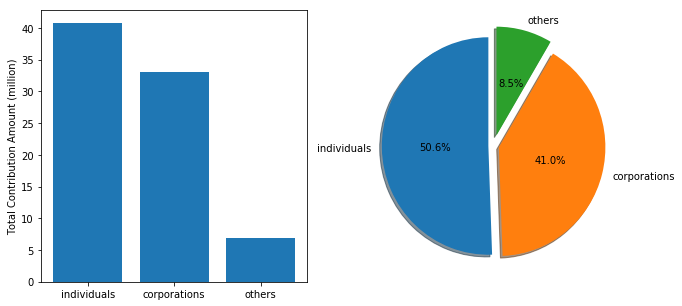

In [48]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10.5,5))
plt.subplot(121)
plt.bar([1,2,3],[40.773943,33.034416,80.648811-40.773943-33.034416])
plt.xticks((1,2,3),("individuals","corporations","others"))
plt.ylabel("Total Contribution Amount (million)")

plt.subplot(122)
plt.pie(x=[40773943,33034416,80648811-40773943-33034416],labels=["individuals","corporations","others"] \
        ,explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True,startangle = 90,pctdistance = 0.5)

plt.show()

* Let find out which candidate received most to contributions.

In [49]:
%%sql
SELECT campaign.candidate_name,SUM(amount) AS totalamount
FROM contribution_facts
LEFT OUTER JOIN campaign
ON contribution_facts.campaign_key=campaign.campaign_key
GROUP BY campaign.candidate_name
ORDER BY totalamount DESC
LIMIT 5

5 rows affected.


candidate_name,totalamount
None,14219515.24
Adrian Fenty,10088343.88
Vincent Gray,5601105.56
Muriel Bowser,5271705.22
Jack Evans,3876458.15


```
It seems that some campaign candidates are not specified.
Adrian Fenty received the most contribution.
```

* How about the contribution amount difference among election years?

Notice that my phone number is in the year.

In [50]:
%%sql
SELECT campaign.election_year,SUM(amount) AS totalamount
FROM contribution_facts
LEFT OUTER JOIN campaign
ON contribution_facts.campaign_key=campaign.campaign_key
GROUP BY campaign.election_year
HAVING election_year != 2028554071
ORDER BY election_year

14 rows affected.


election_year,totalamount
2002,9178971.62
2004,7115197.12
2006,15093323.97
2007,1968907.67
2008,4730280.59
2010,12598725.81
2011,918029.94
2012,4633592.00
2013,1131566.15
2014,16176759.41


<Container object of 14 artists>

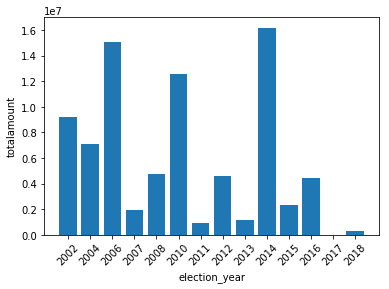

In [51]:
%matplotlib inline
_.bar()

I can not figure out any trend from this plot.

##### Thank you for reviewing!